In [2]:
# this notebook is used to create the building model area
# Author: Younes IBNE-ETTALEB
# we will create a Character recognition model to recognize the Tifinagh characters from the dataset
# we will use the Keras library to create the model
# we will use the Tensorflow library to train the model
# we will use the OpenCV library to preprocess the images
# we will use the Numpy library to manipulate the images
# we will use the Matplotlib library to plot the images
# we will use the Pandas library to manipulate the data

# import the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import os
import glob

In [19]:
# first we will read the dataset with labels
dataset_dir = r"dataset"
# the firsl folder is "AMHCD_64", it contains folders of images with labels
# let's read the images and labels (the labels are the names of the folders)
images_dir = os.path.join(dataset_dir, "AMHCD_64")
images = []
labels = []
for folder in os.listdir(images_dir)[:3]:
    print("reading images from folder: ", folder)
    for file in os.listdir(os.path.join(images_dir, folder)):
        image = cv2.imread(os.path.join(images_dir, folder, file))
        images.append(image)
        labels.append(folder)

#show the number of images and labels
print("number of images: ", len(images))
print("number of labels: ", len(labels))


reading images from folder:  ya
reading images from folder:  yab
reading images from folder:  yach
number of images:  2340
number of labels:  2340


In [20]:
# convert the images to grayscale
images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

# resize the images to 64x64
images = [cv2.resize(image, (64, 64)) for image in images]

# convert the images to numpy arrays
images = np.array(images)

# our labels are categorical, we need to convert them to numerical values
# we will use the LabelEncoder class from the sklearn library
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)



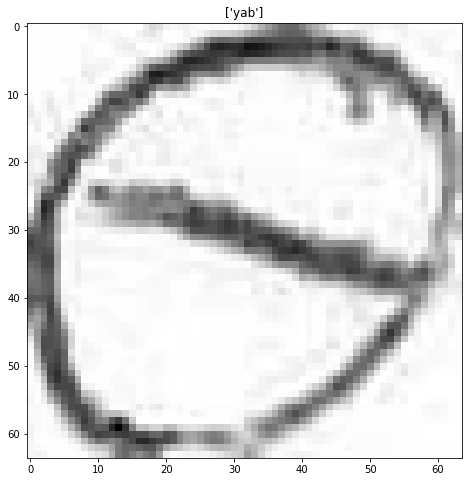

In [26]:
# show the first image in the training set with its label
plt.figure(figsize=(8, 8))
plt.imshow(X_train[0], cmap="gray")
plt.title(label_encoder.inverse_transform([y_train[0]]))
plt.show()

In [27]:
# create the model using the Sequential class from the Keras library
#####################################################################
# the model architecture is:
#conv_1 (Conv 2D) (None, 26, 26, 32) 320
#conv_2 (Conv 2D) (None, 26, 26, 64) 18,496
#max_pooling2D_18 (MaxPooling2D) (None, 13, 13, 64) 0
#conv_3 (Conv 2D) (None, 13, 13, 128) 73,856
#max_pooling2D_19 (MaxPooling2D) (None, 6, 6, 128) 0
#conv_4 (Conv 2D) (None, 6, 6, 256) 295,168
#max_pooling2D_20 (MaxPooling2D) (None, 3, 3, 256) 0
#flatten (Flatten) (None, 2304) 0
#FC_1 (Dense) (None, 64) 147,520
#FC_2 (Dense) (None, 10) 650
#####################################################################

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

# show the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 256)      

In [28]:
# now we will compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
59/59 [==============================] - 23s 373ms/step - loss: 5.0198 - accuracy: 0.6779 - val_loss: 0.0275 - val_accuracy: 0.9915
Epoch 2/10
59/59 [==============================] - 21s 362ms/step - loss: 0.0321 - accuracy: 0.9893 - val_loss: 0.0442 - val_accuracy: 0.9893
Epoch 3/10
59/59 [==============================] - 22s 374ms/step - loss: 0.0184 - accuracy: 0.9925 - val_loss: 0.0312 - val_accuracy: 0.9872
Epoch 4/10
59/59 [==============================] - 21s 364ms/step - loss: 0.0137 - accuracy: 0.9952 - val_loss: 0.0109 - val_accuracy: 0.9957
Epoch 5/10
59/59 [==============================] - 21s 363ms/step - loss: 0.0089 - accuracy: 0.9968 - val_loss: 0.0104 - val_accuracy: 0.9915
Epoch 6/10
59/59 [==============================] - 22s 380ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0112 - val_accuracy: 0.9957
Epoch 7/10
59/59 [==============================] - 23s 389ms/step - loss: 0.0349 - accuracy: 0.9915 - val_loss: 0.0577 - val_accuracy: 0.9872

In [29]:
# we will test the model on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print("accuracy: ", np.sum(y_pred == y_test) / len(y_test))

15/15 [==============================] - 2s 94ms/step
accuracy:  0.9957264957264957


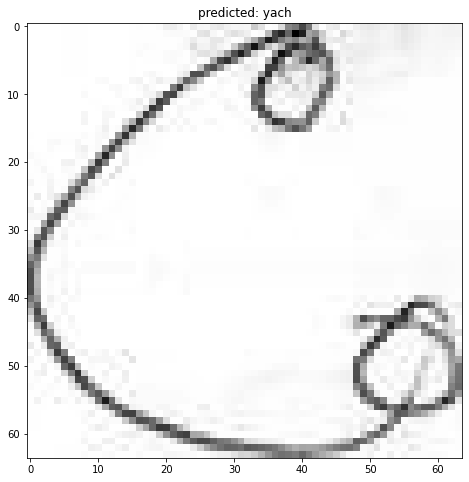

In [30]:
# test it on the first image in the test set and show the result with ploting the image
plt.figure(figsize=(8, 8))
plt.imshow(X_test[0], cmap="gray")
plt.title("predicted: " + label_encoder.inverse_transform([y_pred[0]])[0])
plt.show()
